In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('co2.csv', delimiter=";", index_col=0)
df = df[df.index >= "1950"]
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")
df.head()

,data_mean_global,data_mean_nh,data_mean_sh
date,,,
1950-01-15,313.597898,314.751334,312.444461
1950-02-15,313.968034,315.402500,312.533568
1950-03-15,314.274349,315.997671,312.551026
1950-04-15,314.468454,316.441488,312.495420
1950-05-15,314.310746,316.134174,312.487318


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 780 entries, 1950-01-15 to 2014-12-15
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_mean_global  780 non-null    float64
 1   data_mean_nh      780 non-null    float64
 2   data_mean_sh      780 non-null    float64
dtypes: float64(3)
memory usage: 24.4 KB


In [38]:
annual_mean = df.groupby(df.index.year).mean()

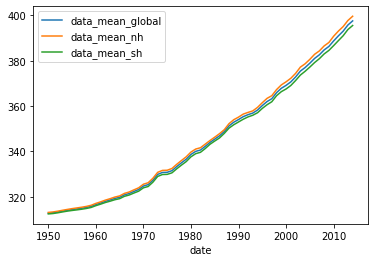

In [39]:
annual_mean.plot()

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
monthly_df = pd.DataFrame(df)
nh_df = pd.DataFrame(df['data_mean_nh'])
nh_df['geo'] = "data_mean_nh"
nh_df.columns = ['value', 'geo']
gl_df = pd.DataFrame(df['data_mean_global'])
gl_df['geo'] = "data_mean_global"
gl_df.columns = ['value', 'geo']
sh_df = pd.DataFrame(df['data_mean_sh'])
sh_df['geo'] = "data_mean_sh"
sh_df.columns = ['value', 'geo']
monthly_df = pd.concat([nh_df, gl_df, sh_df])
monthly_df['month'] = monthly_df.index.strftime('%b')

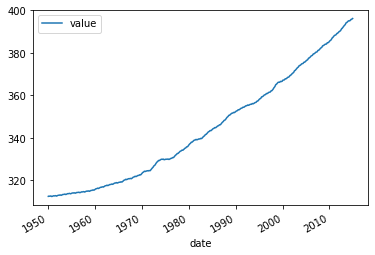

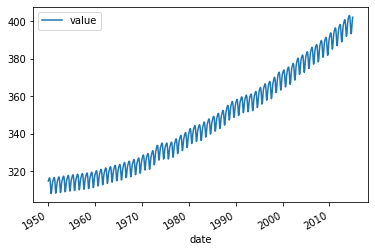

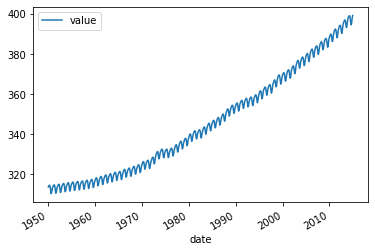

In [45]:
monthly_df[monthly_df['geo'] == 'data_mean_sh'].plot()
monthly_df[monthly_df['geo'] == 'data_mean_nh'].plot()
monthly_df[monthly_df['geo'] == 'data_mean_global'].plot()

In [47]:
monthly_df[monthly_df['geo'] == 'data_mean_sh']

,value,geo,month
date,,,
1950-01-15,312.444461,data_mean_sh,Jan
1950-02-15,312.533568,data_mean_sh,Feb
1950-03-15,312.551026,data_mean_sh,Mar
1950-04-15,312.495420,data_mean_sh,Apr
1950-05-15,312.487318,data_mean_sh,May
...,...,...,...
2014-08-15,395.770379,data_mean_sh,Aug
2014-09-15,395.734959,data_mean_sh,Sep
2014-10-15,395.880867,data_mean_sh,Oct


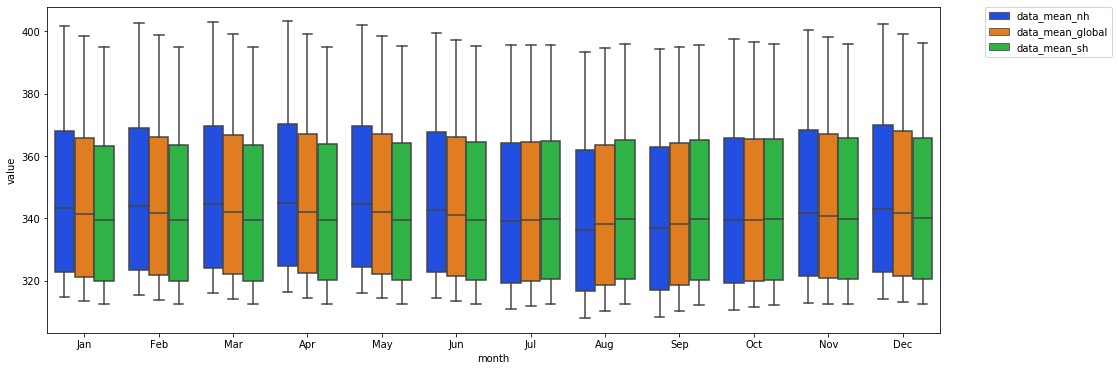

In [50]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(
    x='month',y='value',hue='geo', data=monthly_df,
    palette="bright")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# ax.set

In [13]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1950-01-15 to 2014-12-15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   2340 non-null   float64
 1   geo     2340 non-null   object 
 2   month   2340 non-null   object 
dtypes: float64(1), object(2)
memory usage: 153.1+ KB


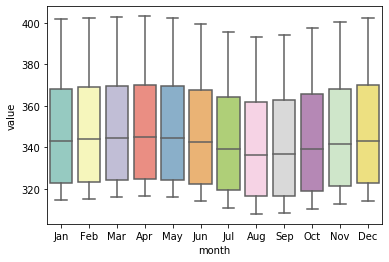

In [14]:
sns.boxplot(x='month',y='value', data=monthly_df.loc[monthly_df['geo'] == 'data_mean_nh'], palette="Set3")

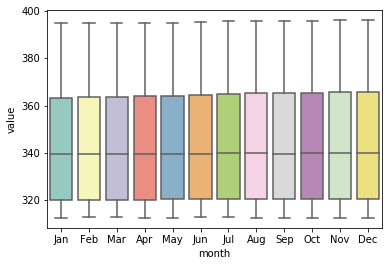

In [15]:
sns.boxplot(x='month',y='value', data=monthly_df.loc[monthly_df['geo'] == 'data_mean_sh'], palette="Set3")

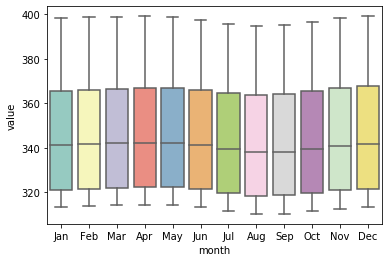

In [16]:
sns.boxplot(x='month',y='value', data=monthly_df.loc[monthly_df['geo'] == 'data_mean_global'], palette="Set3")

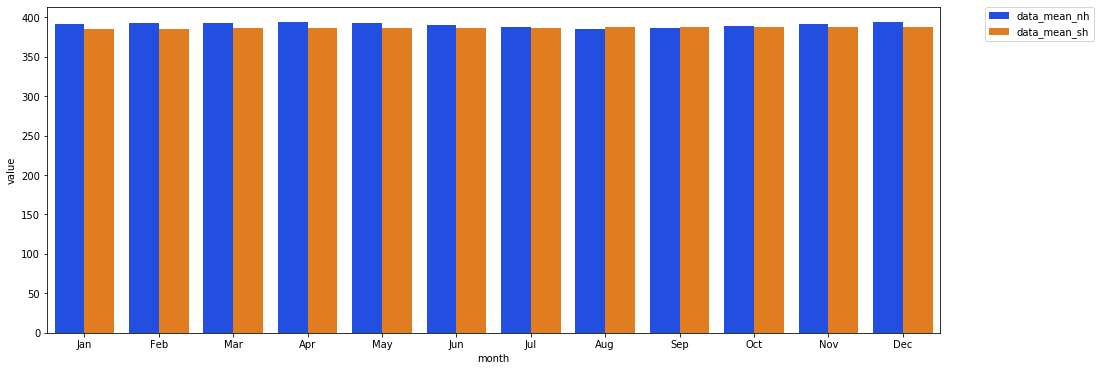

In [54]:
new_monthly = monthly_df.loc[(monthly_df.index.year == 2010) & (monthly_df['geo'] != 'data_mean_global')]
plt.figure(figsize=(16, 6))
ax = sns.barplot(
    x='month', y='value', hue='geo', data=new_monthly,
    palette="bright")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

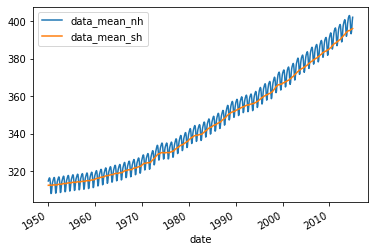

In [62]:
df_nh_sh = df.loc[:, ["data_mean_nh", "data_mean_sh"]]
df_nh_sh.plot()

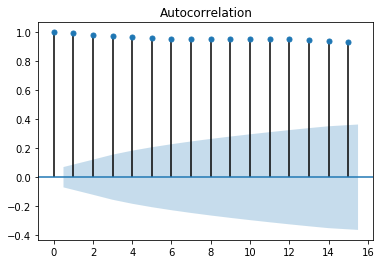

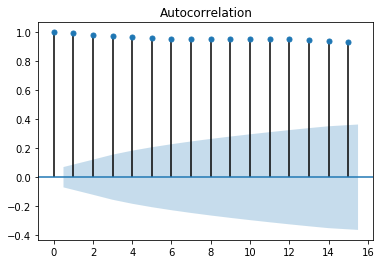

In [143]:
# for i in range(1,16):
plot_acf(df_nh_sh['data_mean_nh'], lags=15)

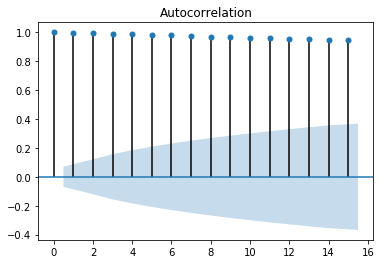

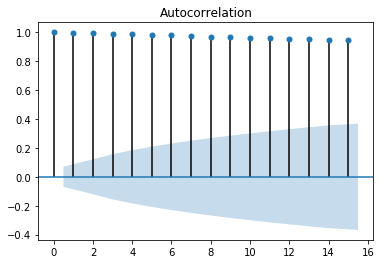

In [64]:
plot_acf(df_nh_sh['data_mean_sh'], lags=15)

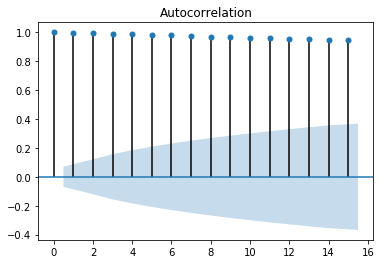

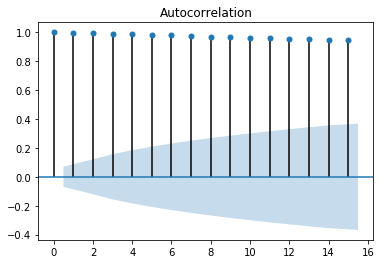

In [28]:
plot_acf(monthly_df.loc[monthly_df['geo'] == 'data_mean_sh', ['value']], lags=15)

In [169]:
from statsmodels.tsa.seasonal import seasonal_decompose
nh_df = pd.Series(df["data_mean_nh"].values, index=pd.date_range('1950-01', periods=780, freq='M'))

In [170]:
result = seasonal_decompose(nh_df, model='additive')

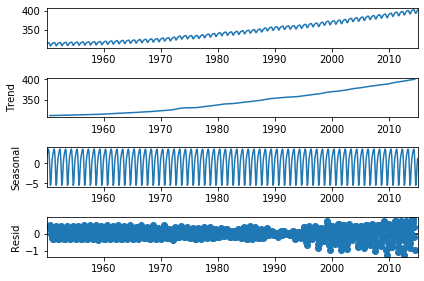

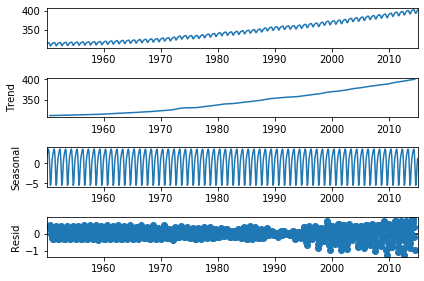

In [171]:
result.plot()

In [95]:
import statsmodels.api as sm

<Figure size 432x288 with 0 Axes>

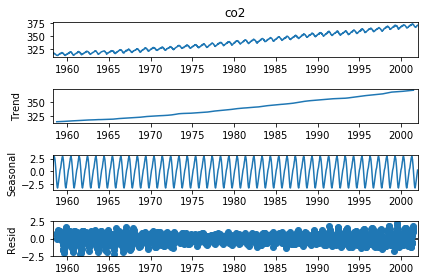

In [96]:
co2_data = sm.datasets.co2.load_pandas().data
co2_data.co2.interpolate(inplace=True)
result = sm.tsa.seasonal_decompose(co2_data.co2)
fig = plt.figure()
fig = result.plot()

In [111]:
co2_data.co2

1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Freq: W-SAT, Name: co2, Length: 2284, dtype: float64

In [172]:
result = seasonal_decompose(nh_df, model='multiplicative')

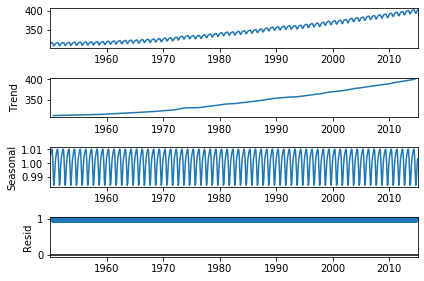

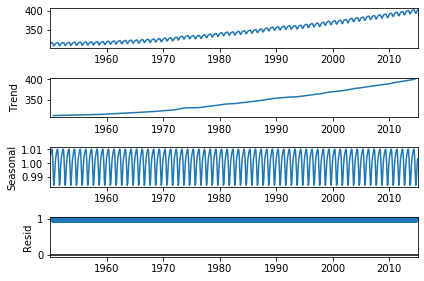

In [173]:
result.plot()